<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/BJP3Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 90 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (90/90), done.


In [4]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-10-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#bjp bihar")  
           
data1 = list(zip(text))
df = pd.DataFrame(data =data1, columns =["Tweet"])

df.to_csv('bjp3.csv') 

RT @OfficeofAjit: #DarbhangaAirport  has been started from today onwards.. Thanks to #NarendraModi and #NitishKumar. Before 15 year it was…
<--------------------------------------------------->
1
Bihar Exit Polls says RJD  congress alliance  wins people mandate - Click to see also ☛  https://t.co/XwatuZy8uE… https://t.co/Zmq7QeUMr5
<--------------------------------------------------->
2
#बीजेपी_पर_थूकता_है_भारत All India now doing pray that #BJP should loose all the coming elections in states. #Bihar will begin the count.
<--------------------------------------------------->
3
#ArnabGoswami probably #BJP leaders will react for Arnab after Bihar elections
<--------------------------------------------------->
4
@amitbrahm @RizwanS06862783 @DelhiPolice @KapilMishra_IND @TajinderBagga @DCPCentralDelhi @AmitShah #bjp is only do… https://t.co/3BI5HZiqcG
<--------------------------------------------------->
5
RT @DrNimrata_: The most underrated Chronology of the decade .... #9November #BabriM

# **Importing Libraries**


In [5]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **CLEANING BJP DATASET 3**

In [7]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

568



> **Removing duplicates tweets if any.**



In [8]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

395

In [10]:
df['Tweet'].duplicated().sum()

173

```
Number of duplicates tweets
```



In [12]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(395, 1)



```
Removed all the duplicate tweets
```





> **Removing emojis**



In [15]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)



```
From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet' 
```



In [17]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

65

In [19]:
df.shape

(330, 2)

In [21]:
df['Processed_Tweet']

1      Bihar Exit Polls says RJD  congress alliance  ...
2      #बीजेपी_पर_थूकता_है_भारत All India now doing p...
3      #ArnabGoswami probably #BJP leaders will react...
4      @amitbrahm @RizwanS06862783 @DelhiPolice @Kapi...
7      Bihar Elections are Over now,  People are now ...
                             ...                        
388    #BiharElections: In 94 seats today, #RJD bets ...
390    Despite repeated attempts by #BJP to turn #Bih...
391    My dear biharis,Do you remember what #BJP has ...
393    Prime Minister Narendra Modi alleged that oppo...
394    Why are National Media channels playing #BJP s...
Name: Processed_Tweet, Length: 330, dtype: object



>**Removing username**



In [22]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

1      Bihar Exit Polls says RJD  congress alliance  ...
2      #बीजेपी_पर_थूकता_है_भारत All India now doing p...
3      #ArnabGoswami probably #BJP leaders will react...
4                    #bjp is only do… https://t.co/3B...
7      Bihar Elections are Over now,  People are now ...
                             ...                        
388    #BiharElections: In 94 seats today, #RJD bets ...
390    Despite repeated attempts by #BJP to turn #Bih...
391    My dear biharis,Do you remember what #BJP has ...
393    Prime Minister Narendra Modi alleged that oppo...
394    Why are National Media channels playing #BJP s...
Name: Processed_Tweet, Length: 330, dtype: object



> **Removing URL, if any**



In [24]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

1      Bihar Exit Polls says RJD  congress alliance  ...
2      #बीजेपी_पर_थूकता_है_भारत All India now doing p...
3      #ArnabGoswami probably #BJP leaders will react...
4                                      #bjp is only do… 
7      Bihar Elections are Over now,  People are now ...
                             ...                        
388    #BiharElections: In 94 seats today, #RJD bets ...
390    Despite repeated attempts by #BJP to turn #Bih...
391    My dear biharis,Do you remember what #BJP has ...
393    Prime Minister Narendra Modi alleged that oppo...
394    Why are National Media channels playing #BJP s...
Name: Processed_Tweet, Length: 330, dtype: object



> **Removing Hashtags but keeping the word**



In [25]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

1      Bihar Exit Polls says RJD  congress alliance  ...
2      बीजेपी_पर_थूकता_है_भारत All India now doing pr...
3      ArnabGoswami probably BJP leaders will react f...
4                                       bjp is only do… 
7      Bihar Elections are Over now,  People are now ...
                             ...                        
388    BiharElections: In 94 seats today, RJD bets Le...
390    Despite repeated attempts by BJP to turn Bihar...
391    My dear biharis,Do you remember what BJP has d...
393    Prime Minister Narendra Modi alleged that oppo...
394    Why are National Media channels playing BJP sp...
Name: Processed_Tweet, Length: 330, dtype: object



> **Using Preprocessor library**



In [26]:
!pip install tweet-preprocessor

In [27]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

1      Bihar Exit Polls says RJD congress alliance wi...
2      ____ All India now doing pray that BJP should ...
3      ArnabGoswami probably BJP leaders will react f...
4                                         bjp is only do
7      Bihar Elections are Over now, People are now a...
                             ...                        
388    BiharElections: In seats today, RJD bets Left ...
390    Despite repeated attempts by BJP to turn Bihar...
391    My dear biharis,Do you remember what BJP has d...
393    Prime Minister Narendra Modi alleged that oppo...
394    Why are National Media channels playing BJP sp...
Name: Processed_Tweet, Length: 330, dtype: object

> **Removing any special characters, numbers, punctuations,etc..**

In [28]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

1      Bihar Exit Polls says RJD congress alliance wi...
2           All India now doing pray that BJP should ...
3      ArnabGoswami probably BJP leaders will react f...
4                                         bjp is only do
7      Bihar Elections are Over now  People are now a...
                             ...                        
388    BiharElections  In seats today  RJD bets Left ...
390    Despite repeated attempts by BJP to turn Bihar...
391    My dear biharis Do you remember what BJP has d...
393    Prime Minister Narendra Modi alleged that oppo...
394    Why are National Media channels playing BJP sp...
Name: Processed_Tweet, Length: 330, dtype: object

> **Converting to lowercase**

In [29]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

1      bihar exit polls says rjd congress alliance wi...
2           all india now doing pray that bjp should ...
3      arnabgoswami probably bjp leaders will react f...
4                                         bjp is only do
7      bihar elections are over now  people are now a...
                             ...                        
388    biharelections  in seats today  rjd bets left ...
390    despite repeated attempts by bjp to turn bihar...
391    my dear biharis do you remember what bjp has d...
393    prime minister narendra modi alleged that oppo...
394    why are national media channels playing bjp sp...
Name: Processed_Tweet, Length: 330, dtype: object



```
We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that


```



In [30]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()



> **Removing Stop Words**



In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['weren', 'out', "mightn't", 'for', 'nor', "didn't", 'herself', 'again', 'any', 'was', 'where', 'were', 'on', 'll', 'ain', 'because', 'too', 'wouldn', 'above', "should've", 'their', 'of', 'not', 'very', 'same', 'a', "doesn't", 'couldn', 'during', 'each', "aren't", 'shan', 'no', 'you', "hadn't", "that'll", "mustn't", 'own', 'most', 'aren', 've', 'be', 'itself', 'ma', 'now', 'being', 's', "needn't", 'isn', 'the', "you'll", 'into', 'to', 'hadn', 'are', 'd', 'having', "couldn't", 'until', 'before', 'this', 'its', 'should', 'just', 'don', "hasn't", 'mustn', 'at', 'i', 'when', "weren't", 'did', 'only', 'themselves', "isn't", 'm', 'am', 'have', 'there', 're', 'that', 'yourselves', 'against', 'yours', 'such', "wasn't", 'with', 'is', 'mightn', 'from', 'doesn', 'been', 'between', 'these', "wouldn't", 'after', "shan't", 'an', 'or', 'won', 'what', 'over', 'me', 'then', 'ours', 'those', 'himself', "you've", 'here', 'y', 'myself', 'had', "shouldn't", 'up', 'shouldn', 'but', 'below', 'our', 'while', 

In [33]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

1      bihar exit polls says rjd congress alliance wi...
2      india pray bjp loose coming elections states b...
3      arnabgoswami probably bjp leaders react arnab ...
4                                                    bjp
7      bihar elections people aware real face bjp ncb...
                             ...                        
388    biharelections seats today rjd bets left prove...
390    despite repeated attempts bjp turn biharpolls ...
391    dear biharis remember bjp done years neither g...
393    prime minister narendra modi alleged opponents...
394    national media channels playing bjp speeches p...
Name: Processed_Tweet, Length: 330, dtype: object



> **Tokenizing**



In [34]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

1      [bihar, exit, polls, says, rjd, congress, alli...
2      [india, pray, bjp, loose, coming, elections, s...
3      [arnabgoswami, probably, bjp, leaders, react, ...
4                                                  [bjp]
7      [bihar, elections, people, aware, real, face, ...
                             ...                        
388    [biharelections, seats, today, rjd, bets, left...
390    [despite, repeated, attempts, bjp, turn, bihar...
391    [dear, biharis, remember, bjp, done, years, ne...
393    [prime, minister, narendra, modi, alleged, opp...
394    [national, media, channels, playing, bjp, spee...
Name: Processed_Tweet, Length: 330, dtype: object



> **Stemming**



In [35]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

1      [bihar, exit, poll, say, rjd, congress, allian...
2      [india, pray, bjp, loos, come, elect, state, b...
3      [arnabgoswami, probabl, bjp, leader, react, ar...
4                                                  [bjp]
7      [bihar, elect, peopl, awar, real, face, bjp, n...
                             ...                        
388    [biharelect, seat, today, rjd, bet, left, prov...
390    [despit, repeat, attempt, bjp, turn, biharpol,...
391    [dear, bihari, rememb, bjp, done, year, neithe...
393    [prime, minist, narendra, modi, alleg, oppon, ...
394    [nation, media, channel, play, bjp, speech, po...
Name: Processed_Tweet, Length: 330, dtype: object

In [36]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Tweet,Processed_Tweet
1,Bihar Exit Polls says RJD congress alliance ...,"[bihar, exit, poll, say, rjd, congress, allian..."
2,#बीजेपी_पर_थूकता_है_भारत All India now doing p...,"[india, pray, bjp, loos, come, elect, state, b..."
3,#ArnabGoswami probably #BJP leaders will react...,"[arnabgoswami, probabl, bjp, leader, react, ar..."
4,@amitbrahm @RizwanS06862783 @DelhiPolice @Kapi...,[bjp]
7,"Bihar Elections are Over now, People are now ...","[bihar, elect, peopl, awar, real, face, bjp, n..."
...,...,...
388,"#BiharElections: In 94 seats today, #RJD bets ...","[biharelect, seat, today, rjd, bet, left, prov..."
390,Despite repeated attempts by #BJP to turn #Bih...,"[despit, repeat, attempt, bjp, turn, biharpol,..."
391,"My dear biharis,Do you remember what #BJP has ...","[dear, bihari, rememb, bjp, done, year, neithe..."
393,Prime Minister Narendra Modi alleged that oppo...,"[prime, minist, narendra, modi, alleg, oppon, ..."


In [38]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

3356

In [40]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

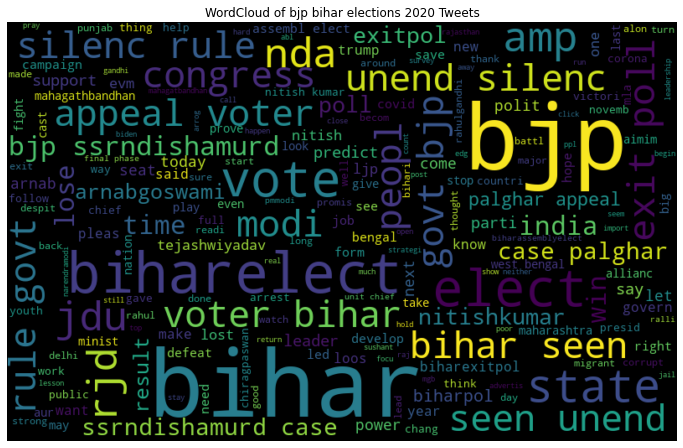

In [41]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**

In [42]:
from textblob import TextBlob

In [43]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

330

In [44]:
df['Processed_Tweet']

1      [bihar, exit, poll, say, rjd, congress, allian...
2      [india, pray, bjp, loos, come, elect, state, b...
3      [arnabgoswami, probabl, bjp, leader, react, ar...
4                                                  [bjp]
7      [bihar, elect, peopl, awar, real, face, bjp, n...
                             ...                        
388    [biharelect, seat, today, rjd, bet, left, prov...
390    [despit, repeat, attempt, bjp, turn, biharpol,...
391    [dear, bihari, rememb, bjp, done, year, neithe...
393    [prime, minist, narendra, modi, alleg, oppon, ...
394    [nation, media, channel, play, bjp, speech, po...
Name: Processed_Tweet, Length: 330, dtype: object

In [45]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 107
Negative Tweets: 37
Neutral Tweets 186




```
Classifying Tweets As Positive,Negetive and Neutral
```



In [46]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.000,0.759,0.241,0.5859
1,0.000,0.796,0.204,0.3182
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.196,0.804,0.000,-0.2960
...,...,...,...,...
325,0.000,0.756,0.244,0.4404
326,0.000,1.000,0.000,0.0000
327,0.000,0.794,0.206,0.3818
328,0.000,1.000,0.000,0.0000


In [48]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,0.759,0.241,0.5859,Positive
1,0.000,0.796,0.204,0.3182,Positive
2,0.000,1.000,0.000,0.0000,Neutral
3,0.000,1.000,0.000,0.0000,Neutral
4,0.196,0.804,0.000,-0.2960,Negative


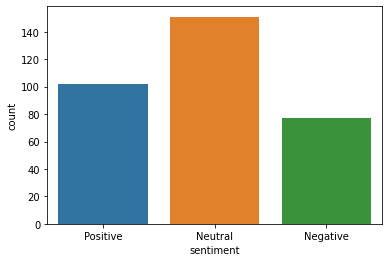

In [49]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)